<h1>Camorahan, Lorenz V.<h1>
<h2>T09-A<h2>
<hr style = "border:2.5px solid #0000FF"></hr>

#

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [41]:
df = pd.read_csv(r"/Users/lorenzcamorahan/Desktop/Statistics/transformer-voltage.csv",
                index_col='Sample',
                delimiter=",")
df

,Voltage
Sample,
1,117.0
2,118.3
3,119.5
4,119.5
5,119.6
6,119.6
7,119.7
8,119.7
9,119.7


In [42]:
df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [43]:
alpha=0.5
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(0.6744897501960817)

In [44]:
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(  
    confidence = 0.95,
    loc =df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)
print(f"Confidence Interval: [{ci_lower: .2f}, [{ci_upper: .2f}]")

Confidence Interval: [ 118.50, [ 122.08]


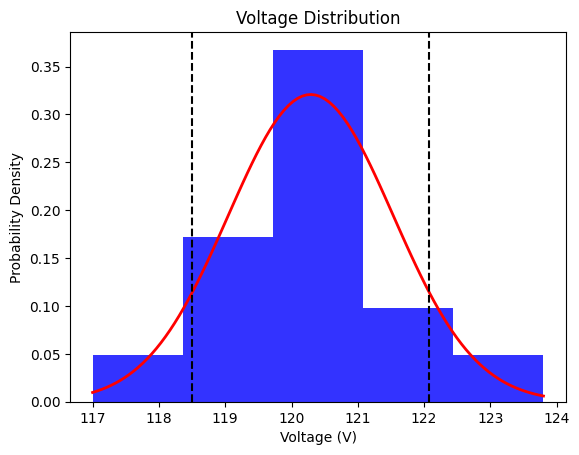

In [45]:
#voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()


x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x,p,
         linewidth=2,
         color = "red"
         )

plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha=0.8,
         color = "blue"
         )

plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

plt.axvline(x=ci_lower,
            color = 'black',
            linestyle='--',)

plt.axvline(x=ci_upper,
            color = 'black',
            linestyle='--',)
plt.show()